# Übersicht: Nützliche Python-Module

Hier sind alle im Kurs verwendeten Bibliotheken (Module) kurz aufgelistet. Die einzelnen Module wurden in thematische Gruppen gegliedert.

**Inhaltsverzeichnis**

- Data Science
    - csv
    - pandas
    - NumPy
    - matplotlib
- Machine Learning
    - scikit-learn
- Machine Vision
    - OpenCV
- Web Scraping
    - requests
    - beautifulsoup4
    - urllib
- Datenstrukturen
    - collections
    - queue
    - re
- Zeit
    - datetime
    - time
- Interaktive Jupyter Notebooks
    - ipywidgets
- Meta-Informationen
    - sys



-----------------

## Data Science

### csv

Mit dem `csv`-Modul lassen sich CSV-Daten komfortabel laden (CSV = comma separated values).

#### Modul einbinden

In [2]:
import csv

#### Anwendung

In [3]:
with open("./resources/datei.csv", encoding="utf-8") as file:
    csv_file = csv.reader(file, delimiter=",")
    for line in csv_file:
        print(line)
        
# Anstatt:

# with open("datei.csv") as file:
#    for line in file:
#        data = line.strip().split(",")
#        print(data)

['Name', 'Telefonnummer', 'Land']
['Müller', '+49123456789', 'Deutschland']
['Mustermann', '+3612345678', 'Ungarn']


#### Weitere Infos:

https://docs.python.org/3/library/csv.html

### pandas

Essentielles Modul zur Datenanalyse mit Python, auch wegen der `DataFrame`-Struktur.

#### Modul einbinden

In [4]:
import pandas as pd # Umbennenung ist Konvention

#### Anwendung

In [5]:
# CSV-Datei als DataFrame einlesen
df = pd.read_csv("../data/astronauts.csv", delimiter=",")
df[["Name", "Year", "Gender"]].head()

,Name,Year,Gender
0,Joseph M. Acaba,2004.0,Male
1,Loren W. Acton,NaN,Male
2,James C. Adamson,1984.0,Male
3,Thomas D. Akers,1987.0,Male
4,Buzz Aldrin,1963.0,Male


In [6]:
# DataFrame nach Frauen filtern, die vor 2000 auf Mission waren

df2 = df[df["Year"] < 2000]
df3 = df2[df2["Gender"] == "Female"]
df3[["Name", "Year", "Gender"]].head()

,Name,Year,Gender
19,Ellen S. Baker,1984.0,Female
50,Yvonne D. Cagle,1996.0,Female
52,Tracy E. Caldwell (Dyson),1998.0,Female
67,Kalpana Chawla,1995.0,Female
70,Laurel B. Clark,1996.0,Female


#### Weitere Infos:

https://pandas.pydata.org/pandas-docs/stable/tutorials.html

### NumPy

`NumPy` vereinfacht wissenschaftliches Rechnen, vor allem durch die `Array`-Datenstruktur.

#### Modul einbinden

In [7]:
import numpy as np # Umbennenung ist Konvention

#### Anwendung

In [8]:
x = np.arange(10) * 3
y = np.zeros(10) + 4

z = x + y
z = z.reshape(5,2)

print(z)
print(type(z))

[[  4.   7.]
 [ 10.  13.]
 [ 16.  19.]
 [ 22.  25.]
 [ 28.  31.]]
<class 'numpy.ndarray'>


#### Weitere Infos:

https://docs.scipy.org/doc/numpy-1.13.0/user/index.html

### matplotlib

Ermöglicht das Visualisieren von Daten.

#### Modul einbinden

In [9]:
# damit die Grafiken innerhalb des Notebooks angezeigt werden
%matplotlib inline 

import matplotlib.pyplot as plt # Umbennenung ist Konvention

#### Typische Anwendung

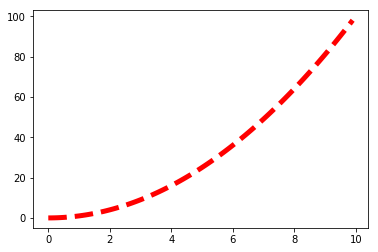

In [10]:
xs = [x / 10 for x in range(0, 100)]
ys = [x * x for x in xs]

# Wir plotten einen Graphen durch die gegebenen Punkte
plt.plot(xs, ys, color="r", linewidth=5, linestyle="dashed")
plt.show()

#### Weitere Infos:

https://matplotlib.org/tutorials/index.html

------------

## Machine Learning

### scikit-learn

Enthält eine Vielzahl von Machine-Learning-Modellen.

#### Modul einbinden

In [11]:
# man sollte nur das Modul zu dem Modell einbinden, das man benutzen möchte
# bei uns ist das hier exemplarisch die Lineare Regression
from sklearn.linear_model import LinearRegression

#### Typische Anwendung 

In [13]:
# Mit pandas die Daten beschaffen und vorbereiten
import pandas as pd

name = "Anna"
gender = "F"
state = "CA"

df = pd.read_csv("../data/names.csv")

df2 = df[df["Name"] == name]
df3 = df2[df2["Gender"] == gender]
df4 = df3[df3["State"] == state]

df5 = df4.sort_values("Year")

xs = df5["Year"]
ys = df5["Count"]

In [14]:
model = LinearRegression()

# Daten vorbereiten, damit sie verarbeitet werden können (Preprocessing)

xsl = []
for x in xs:
    xsl.append([x]) 
model.fit(xsl, ys) # hier findet das Training statt 

 # Häufigkeit der Geburten weiblicher Annas in CA im Jahr 2050 vorhersagen
model.predict([[2050]])

array([ 891.51591679])

#### Weitere Infos:

http://scikit-learn.org/stable/tutorial/basic/tutorial.html

---------------------------------

## Machine Vision

### OpenCV

Enthält Funktionen zur Bilderkennung.

#### Modul einbinden

In [16]:
import cv2

#### Anwendung

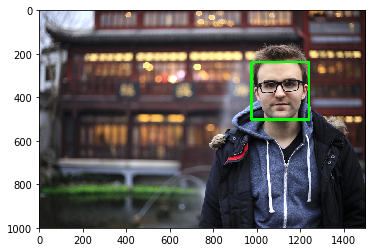

In [18]:
# hierzu brauchen wir zusätzlich matplotlib
%matplotlib inline 

import matplotlib.pyplot as plt # Umbennenung ist Konvention

img = cv2.imread("./resources/bild.jpg")

classifier = cv2.CascadeClassifier("../data/haarcascades/haarcascade_frontalface_alt.xml")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
faces = classifier.detectMultiScale(gray, minNeighbors=10)

c = img.copy()
for face in faces:
    x, y, w, h = face
    cv2.rectangle(c, (x, y), (x + w, y + h), (0, 255, 0), 10)

i = cv2.cvtColor(c, cv2.COLOR_BGR2RGB)
plt.imshow(i)
plt.show()

#### Weitere Infos:
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html

---------------------------------

## Web Scraping

### requests

Den HTML-Code einer Webseite herunterladen.

#### Modul einbinden

In [19]:
import requests

#### Anwendung

In [20]:
url = "http://python.beispiel.programmierenlernen.io"

r = requests.get(url)

# um nicht das Dokument zu sprengen, geben wir hier nur den HTML-Head aus
print(r.text.split("<body>")[0])

<!DOCTYPE html>
<html lang="de">
  <head>
    <meta charset="utf-8">
    <meta name="viewport" content="width=device-width, initial-scale=1, shrink-to-fit=no">
    <meta name="description" content="">
    <meta name="author" content="">
    
    <title>Crawler-Auflistung</title>

    <!-- Bootstrap core CSS -->
    <link href="./lib/bootstrap/css/bootstrap.min.css" rel="stylesheet">
    <link href="./css/narrow-jumbotron.css" rel="stylesheet">
  </head>

  


#### Weitere Infos: 
http://docs.python-requests.org/en/master/user/quickstart/

### beautifulsoup4

Kann HTML-Code zerlegen und weiterverarbeiten.

#### Modul einbinden

In [21]:
from bs4 import BeautifulSoup

#### Anwendung

In [22]:
# BeautifulSoup kommt ins Spiel nachdem dem Webseite heruntergeladen wurde 
# (z.B. mit dem Requests-Modul)

import requests
url = "http://python.beispiel.programmierenlernen.io/index.php"
r = requests.get(url)

In [23]:
doc = BeautifulSoup(r.text, "html.parser")

# mit bs4 können wir auf bestimmte Bereiche innerhalb der HTML zugreifen
# z.B. auf die Inhalte der Tags mit der Klasse card-text
content = doc.select_one(".card-text").text

print(content.replace(". ", ". \n"))

Optio numquam ut accusantium laborum unde assumenda. 
Ea et totam asperiores fugiat voluptatem vitae. 
Et provident nam et mollitia.


#### Weitere Infos: 
https://www.crummy.com/software/BeautifulSoup/bs4/doc/#

### urllib

Vereinfacht die Arbeit mit URLs.

#### Modul einbinden

In [24]:
import urllib

#### Anwendung

In [25]:
from urllib.parse import urljoin 

url = "http://python.beispiel.programmierenlernen.io/index.php"
# häufig sind Quellen als solche abgekürzten URLs angegeben
src = "./img/1.jpg" 

image_url = urljoin(url, src)

print(image_url)

http://python.beispiel.programmierenlernen.io/img/1.jpg


#### Mehr Details: 
https://docs.python.org/3/library/urllib.parse.html



-------------

## Datenstrukturen

### collections
Stellt u. a. die Struktur `defaultdict` bereit, mit der man automatisch dictionaries generieren kann.

#### Modul einbinden

In [26]:
from collections import defaultdict

#### Anwendung

In [27]:
p = defaultdict(int)
words = ["Hallo", "Hier", "Hallo", "Welt", "Welt", "Welt"]

for word in words:
    p[word] = p[word] + 3

print(p)

defaultdict(<class 'int'>, {'Hallo': 6, 'Hier': 3, 'Welt': 9})


#### Weitere Infos:
https://docs.python.org/2/library/collections.html#collections.defaultdict

### queue

Liefert eine Datenstruktur, die eine Warteschlange modelliert.

#### Modul einbinden

In [28]:
import queue

#### Anwendung

In [29]:
q = queue.Queue()

q.put("Hallo")
q.put("Welt")

In [30]:
print(q.get())
print(q.get())

Hallo
Welt


In [31]:
# PriorityQueue
q = queue.PriorityQueue()

q.put((15, "Welt"))
q.put((5, "Hallo"))
q.put((12, "Mars"))

In [32]:
print(q.get())
print(q.get())

(5, 'Hallo')
(12, 'Mars')


#### Weitere Infos:
https://docs.python.org/3.6/library/queue.html

### re 
Ermöglicht mit regulären Ausdrücken sehr flexibel, Strings zu durchsuchen.

#### Modul einbinden

In [33]:
import re

#### Anwendung

In [34]:
sentence = "Habe 30 Hunde, die jeweils 4 Liter Wasser brauchen und 2 kg Nahrung."
re.findall("[0-9]+", sentence)

['30', '4', '2']

#### Weitere Infos:

https://docs.python.org/3.6/library/re.html

------------------------------

## Zeit

### datetime

Stellt Datumsfunktionen bereit.

#### Modul einbinden

In [35]:
import datetime

#### Anwendung

In [36]:
from datetime import datetime, timedelta

In [37]:
now = datetime.now()

print(now)
print(now + timedelta(days = 20, hours = 4, minutes = 3, seconds = 1))

2017-11-08 08:00:27.005140
2017-11-28 12:03:28.005140


In [38]:
day = datetime(2017, 8, 20, 20, 0, 0)

print(day)
print(day.year)

2017-08-20 20:00:00
2017


In [39]:
from datetime import date, time

In [40]:
d = date(2017, 8, 20)
print(d)

t = time(20, 1, 4)
print(t)

2017-08-20
20:01:04


#### Weitere Infos:
https://docs.python.org/3/library/datetime.html

### time
Stellt Zeit- und Datumsfunktionen (so wie das `datetime` - Modul) bereit.

#### Modul importieren

In [41]:
import time

#### Anwendung

In [42]:
print("Auf die Plätze, fertig, los!")
time.sleep(3) # Programmausführung wird für 3 Sekunden angehalten 
print("Im Ziel!")

Auf die Plätze, fertig, los!
Im Ziel!


#### Weitere Infos:
https://docs.python.org/3/library/time.html

--------

## Interaktive Jupyter Notebooks

### ipywidgets

Ermöglicht grafische Bedienelemente (Textfelder, Buttons usw.) in den Jupyter Notebooks einzubauen.

#### Modul einbinden

In [43]:
import ipywidgets as widgets

#### Anwendung

In [44]:
widgets.Button(description="Hallo Welt")

A Jupyter Widget

In [54]:
from IPython.display import display

age = widgets.IntText(description="Alter:", value=25)
display(age)

button = widgets.Button(description="OK")
display(button)

def on_button_click(x):
    print("Du bist nicht wirklich", age.value, "Jahre alt, oder?")

# Wenn geklickt wird: on_button_click(button)
button.on_click(on_button_click)

A Jupyter Widget

A Jupyter Widget

#### Weitere Infos:
https://ipywidgets.readthedocs.io/en/stable/examples/Widget%20Basics.html

---------------------

## Meta-Informationen

### sys
Stellt Informationen über den verwendeten Python-Interpreter bereit (also, welche Distribution mit welchen Eigenschaften vom System verwendet wird).



#### Modul einbinden

In [46]:
import sys

#### Anwendung

In [47]:
print(sys.version)

3.6.2 |Anaconda custom (64-bit)| (default, Sep 21 2017, 18:29:43) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]


#### Weitere Infos:
https://docs.python.org/3/library/sys.html